In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score


Basic Descriptions of the Data and Features

In [3]:
bigdf = pd.read_csv("100K Sales Records.csv")
smalldf = pd.read_csv("1K Sales Records.csv")


In [4]:
bigdf.shape

(100000, 14)

In [5]:
smalldf.shape

(1000, 14)

Pandas Profiling

In [6]:
bigprofile = ProfileReport(bigdf)
bigprofile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
smalldf.rename(columns = {"Order Date": "date"}, 
          inplace = True)
smalldf['date']= pd.to_datetime(smalldf['date'])
smalldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          1000 non-null   object        
 1   Country         1000 non-null   object        
 2   Item Type       1000 non-null   object        
 3   Sales Channel   1000 non-null   object        
 4   Order Priority  1000 non-null   object        
 5   date            1000 non-null   datetime64[ns]
 6   Order ID        1000 non-null   int64         
 7   Ship Date       1000 non-null   object        
 8   Units Sold      1000 non-null   int64         
 9   Unit Price      1000 non-null   float64       
 10  Unit Cost       1000 non-null   float64       
 11  Total Revenue   1000 non-null   float64       
 12  Total Cost      1000 non-null   float64       
 13  Total Profit    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
mem

In [7]:
smalldf.head()

Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority       date   Order ID Ship Date  Units Sold  Unit Price  \
0              M 2014-10-18  686800706  10/31/14        8446      437.20   
1              M 2011-11-07  185941302   12/8/11        3018      154.06   
2              C 2016-10-31  246222341   12/9/16        1517      255.28   
3              C 2010-04-10  161442649   5/12/10        3322      205.70   
4              H 2011-08-16  645713555   8/31/11        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     263.33     3692591.20  2224085.18    1468506.02  
1      90.93      464953.08   274426.74     190526.34  
2     159.42      387259.76   241840.14     145419.62  
3     117.11      683335.40   389039.42     294295.98  
4       6.92       91853.85    68127.40      23726.45

In [8]:
bigdf.head()

Region                Country      Item Type  \
0       Middle East and North Africa             Azerbaijan         Snacks   
1  Central America and the Caribbean                 Panama      Cosmetics   
2                 Sub-Saharan Africa  Sao Tome and Principe         Fruits   
3                 Sub-Saharan Africa  Sao Tome and Principe  Personal Care   
4  Central America and the Caribbean                 Belize      Household   

  Sales Channel Order Priority Order Date   Order ID   Ship Date  Units Sold  \
0        Online              C  10/8/2014  535113847  10/23/2014         934   
1       Offline              L  2/22/2015  874708545   2/27/2015        4551   
2       Offline              M  12/9/2015  854349935   1/18/2016        9986   
3        Online              M  9/17/2014  892836844  10/12/2014        9118   
4       Offline              H   2/4/2010  129280602    3/5/2010        5858   

   Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0      152.58      97.44      142509.72    91008.96      51500.76  
1      437.20     263.33     1989697.20  1198414.83     791282.37  
2        9.33       6.92       93169.38    69103.12      24066.26  
3       81.73      56.67      745214.14   516717.06     228497.08  
4      668.27     502.54     3914725.66  2943879.32     970846.34

In [9]:
bigdf.rename(columns = {"Order Date": "date"}, 
          inplace = True)
bigdf['date']= pd.to_datetime(smalldf['date'])
bigdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  object        
 1   Country         100000 non-null  object        
 2   Item Type       100000 non-null  object        
 3   Sales Channel   100000 non-null  object        
 4   Order Priority  100000 non-null  object        
 5   date            1000 non-null    datetime64[ns]
 6   Order ID        100000 non-null  int64         
 7   Ship Date       100000 non-null  object        
 8   Units Sold      100000 non-null  int64         
 9   Unit Price      100000 non-null  float64       
 10  Unit Cost       100000 non-null  float64       
 11  Total Revenue   100000 non-null  float64       
 12  Total Cost      100000 non-null  float64       
 13  Total Profit    100000 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int

looks like properly labled data

In [10]:
bigdf.isnull().sum()

Region                0
Country               0
Item Type             0
Sales Channel         0
Order Priority        0
date              99000
Order ID              0
Ship Date             0
Units Sold            0
Unit Price            0
Unit Cost             0
Total Revenue         0
Total Cost            0
Total Profit          0
dtype: int64

In [11]:
smalldf.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
date              0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

no missing value

In [12]:
smalldf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          1000 non-null   object        
 1   Country         1000 non-null   object        
 2   Item Type       1000 non-null   object        
 3   Sales Channel   1000 non-null   object        
 4   Order Priority  1000 non-null   object        
 5   date            1000 non-null   datetime64[ns]
 6   Order ID        1000 non-null   int64         
 7   Ship Date       1000 non-null   object        
 8   Units Sold      1000 non-null   int64         
 9   Unit Price      1000 non-null   float64       
 10  Unit Cost       1000 non-null   float64       
 11  Total Revenue   1000 non-null   float64       
 12  Total Cost      1000 non-null   float64       
 13  Total Profit    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
mem

In [13]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  object        
 1   Country         100000 non-null  object        
 2   Item Type       100000 non-null  object        
 3   Sales Channel   100000 non-null  object        
 4   Order Priority  100000 non-null  object        
 5   date            1000 non-null    datetime64[ns]
 6   Order ID        100000 non-null  int64         
 7   Ship Date       100000 non-null  object        
 8   Units Sold      100000 non-null  int64         
 9   Unit Price      100000 non-null  float64       
 10  Unit Cost       100000 non-null  float64       
 11  Total Revenue   100000 non-null  float64       
 12  Total Cost      100000 non-null  float64       
 13  Total Profit    100000 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int

Before this let us check the correlation between different variables, this will give us a roadmap on how to proceed further.



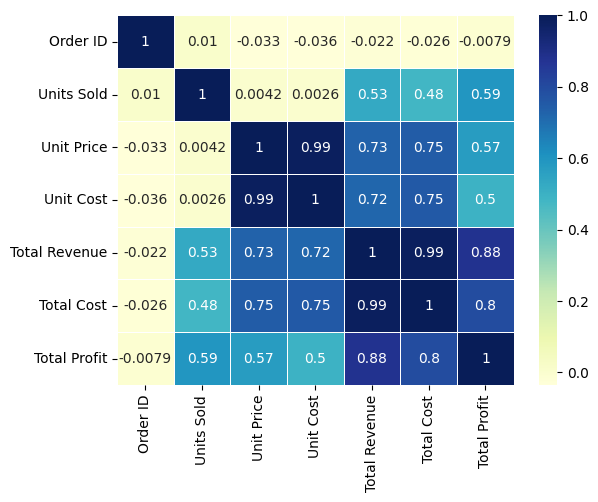

In [14]:
sns.heatmap(smalldf.corr(), annot=True, linewidths=.5,  cmap="YlGnBu")
plt.show()

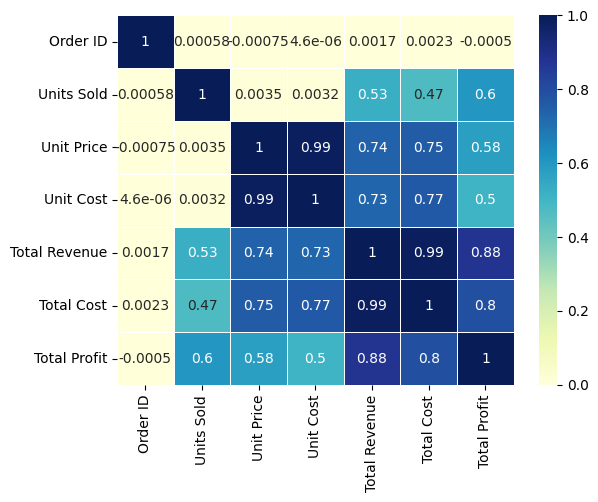

In [15]:
sns.heatmap(bigdf.corr(), annot=True, linewidths=.5,  cmap="YlGnBu")
plt.show()

how the unit price affect the total revenue?

Text(0.5, 1.0, 'Unit Price vs Total Revenue in Small data frame')

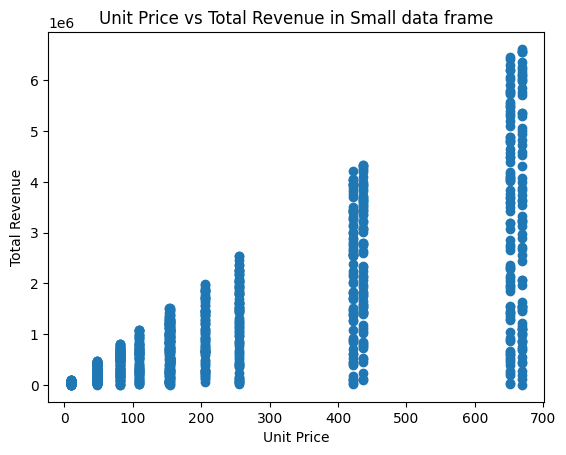

In [16]:
plt.figure()
plt.scatter(x='Unit Price', y='Total Revenue', data=smalldf)
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.title('Unit Price vs Total Revenue in Small data frame')

Text(0.5, 1.0, 'Unit Price vs Total Revenue in big data frame')

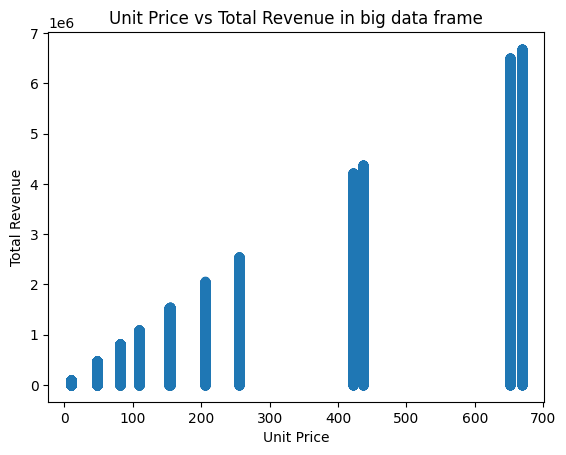

In [17]:
plt.figure()
plt.scatter(x='Unit Price', y='Total Revenue', data=bigdf)
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.title('Unit Price vs Total Revenue in big data frame')

Text(0.5, 1.0, 'Order Priority vs Total Revenue in big data frame')

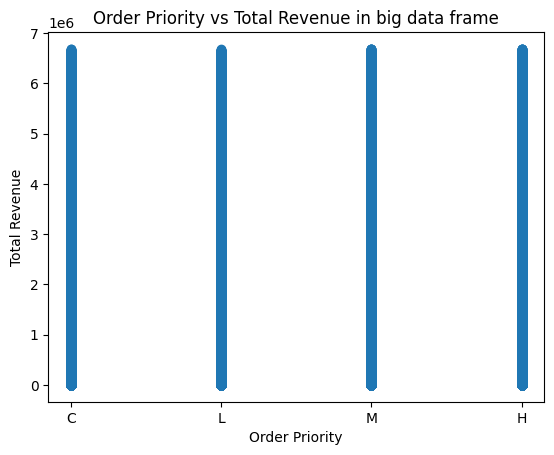

In [18]:
plt.figure()
plt.scatter(x='Order Priority', y='Total Revenue', data=bigdf)
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.title('Order Priority vs Total Revenue in big data frame')

Text(0.5, 1.0, 'Sales Channel vs Total Revenue in big data frame')

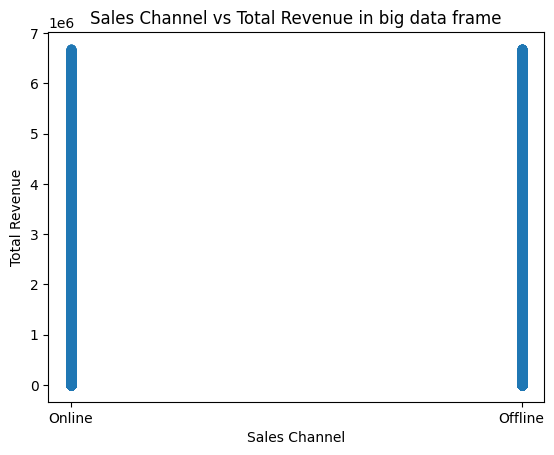

In [19]:
plt.figure()
plt.scatter(x='Sales Channel', y='Total Revenue', data=bigdf)
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.title('Sales Channel vs Total Revenue in big data frame')

Text(0.5, 1.0, 'Item Type vs Total Revenue in big data frame')

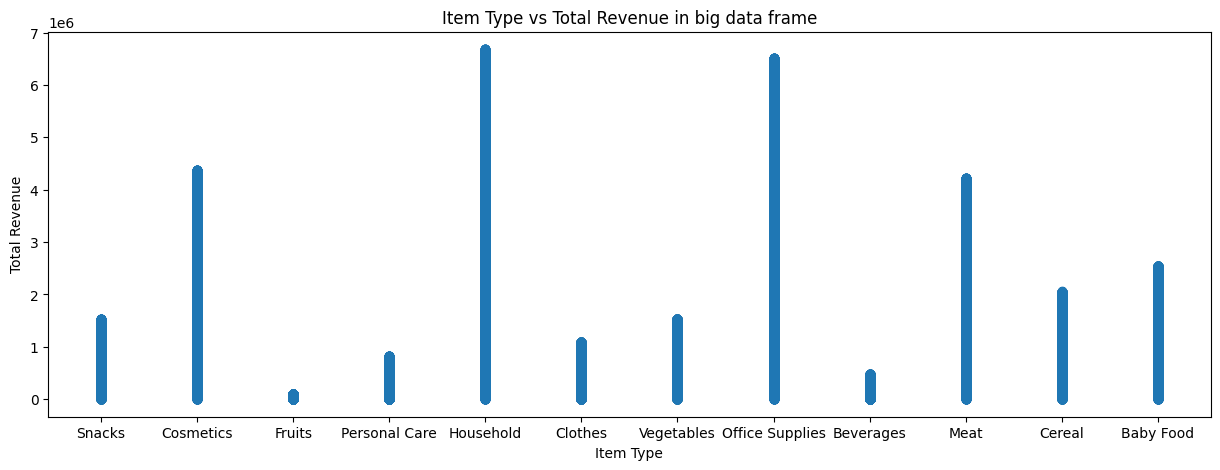

In [20]:
plt.figure(figsize=(15, 5))
plt.scatter(x='Item Type', y='Total Revenue', data=bigdf)
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Item Type vs Total Revenue in big data frame')

Text(0.5, 1.0, 'Region vs Total Revenue in big data frame')

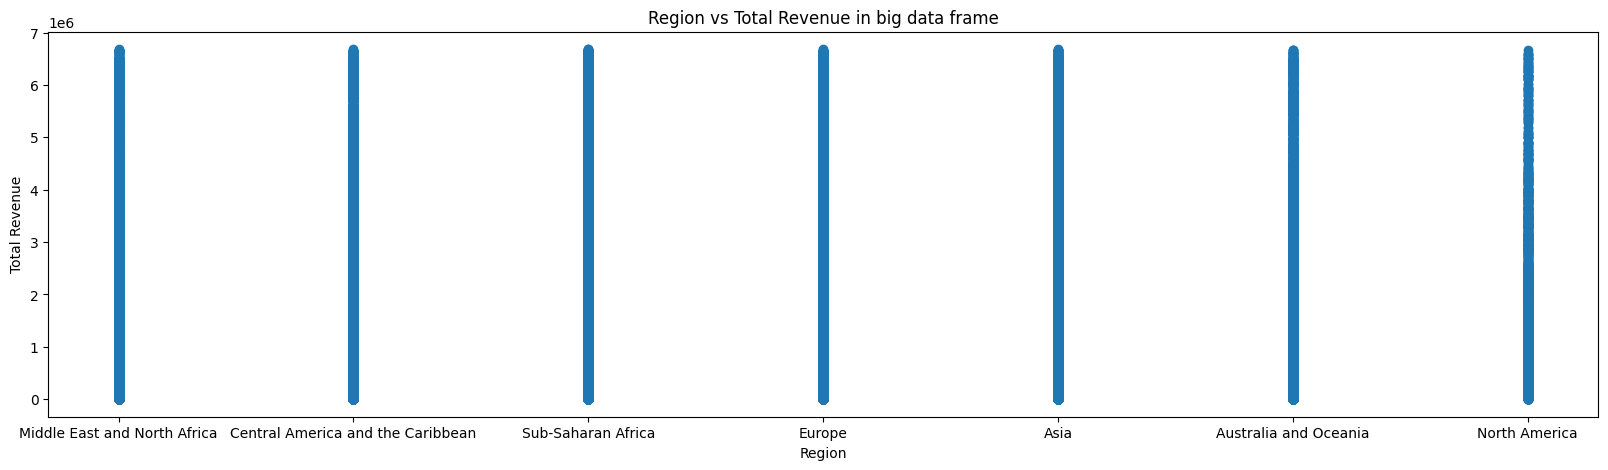

In [21]:
plt.figure(figsize=(20, 5))
plt.scatter(x='Region', y='Total Revenue', data=bigdf)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Region vs Total Revenue in big data frame')

In [22]:
#Unique values in product
bigdf.rename(columns = {"Item Type": "Item_type"}, 
          inplace = True)
bigdf.Item_type.unique()


array(['Snacks', 'Cosmetics', 'Fruits', 'Personal Care', 'Household',
       'Clothes', 'Vegetables', 'Office Supplies', 'Beverages', 'Meat',
       'Cereal', 'Baby Food'], dtype=object)

In [7]:
#create a new column for year
smalldf['year'] = pd.DatetimeIndex(smalldf['date']).year

smalldf_by_year = smalldf[['year', 'Total Revenue']]
smalldf_by_year = smalldf_by_year.groupby('year').sum()
print(smalldf_by_year)

KeyError: 'date'

In [24]:
bigdf['year'] = pd.DatetimeIndex(bigdf['date']).year

bigdf_by_year = bigdf[['year', 'Total Revenue']]
bigdf_by_year = bigdf_by_year.groupby('year').sum()
print(bigdf_by_year)

        Total Revenue
year                 
2010.0   1.948563e+08
2011.0   1.598333e+08
2012.0   1.784909e+08
2013.0   1.597595e+08
2014.0   1.882262e+08
2015.0   1.802557e+08
2016.0   1.594338e+08
2017.0   1.202175e+08


<AxesSubplot:xlabel='year', ylabel='Total Revenue'>

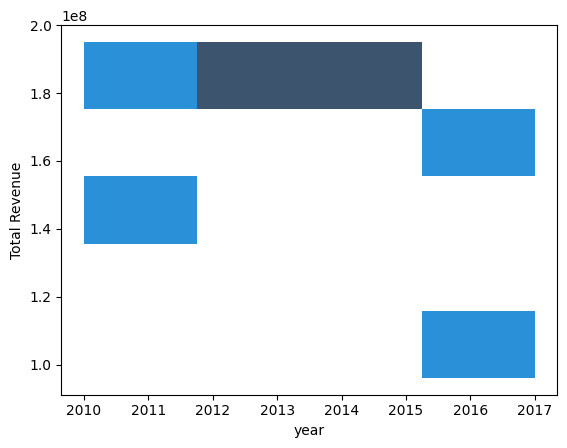

In [25]:
sns.histplot(smalldf_by_year, x='year', y='Total Revenue')

<AxesSubplot:xlabel='year', ylabel='Total Revenue'>

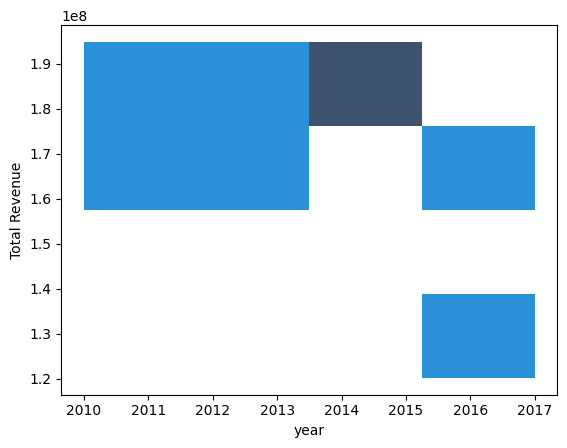

In [26]:
sns.histplot(bigdf_by_year, x='year', y='Total Revenue')

Running regression on big data frame

In [45]:
X=bigdf[['Units Sold', 'Unit Price', 'Unit Cost']]
y = bigdf['Total Revenue']
y


0         142509.72
1        1989697.20
2          93169.38
3         745214.14
4        3914725.66
            ...    
99995    1082599.10
99996    1380424.08
99997    1087117.44
99998    3066958.00
99999    1411718.80
Name: Total Revenue, Length: 100000, dtype: float64

In [46]:
X

Units Sold  Unit Price  Unit Cost
0             934      152.58      97.44
1            4551      437.20     263.33
2            9986        9.33       6.92
3            9118       81.73      56.67
4            5858      668.27     502.54
...           ...         ...        ...
99995        5263      205.70     117.11
99996        3272      421.89     364.69
99997        9948      109.28      35.84
99998        7015      437.20     263.33
99999        3229      437.20     263.33

[100000 rows x 3 columns]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [70]:
from sklearn.ensemble import RandomForestRegressor
random_rf = RandomForestRegressor(n_estimators = 300, random_state = 10)
random_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=10)

In [71]:
y_pred = random_rf.predict(X_test)

In [72]:
y_pred.size

25000

In [73]:
y_test.size

25000

In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse**.5
print(mse)
print(rmse)

111598.76000141122
334.0640058453039


The RMSE is a quadratic scoring rule which measures the average magnitude of the error. Expressing the formula in words, the difference between forecast and corresponding observed values are each squared and then averaged over the sample. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable.

This mean squared error result is very hight. I’d consider this performance inadequate. A root mean square error of 334 means that the average error per estimate is $334 off the actual revenue price.



In [75]:
from sklearn.svm import SVR
svm = SVR(C=1.0, epsilon=0.2)
svm.fit(X_train, y_train)

SVR(epsilon=0.2)

In [76]:
y_pred = svm.predict(X_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**.5
print(mse)
print(rmse)

2440443174187.7856
1562191.785341283
